In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/BP_test/

/content/drive/MyDrive/BP_test


In [3]:
ls

'Distribution of Categories Visualization.png'   test.csv   train.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv("train.csv")

# Display basic information about the dataset
print(train_df.info())

# Display summary statistics of numerical columns
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           8000 non-null   object 
 3   name               8000 non-null   object 
 4   size               8000 non-null   object 
 5   rating             8000 non-null   float64
 6   number_of_reviews  8000 non-null   int64  
 7   love               8000 non-null   int64  
 8   price              8000 non-null   float64
 9   value_price        8000 non-null   float64
 10  URL                8000 non-null   object 
 11  MarketingFlags     8000 non-null   bool   
 12  options            8000 non-null   object 
 13  details            8000 non-null   object 
 14  how_to_use         8000 non-null   object 
 15  ingredients        8000 non-null   object 
 16  exclusive          8000 

# ---- Data Preprocessing ----

In [5]:
# For this example, we won't do extensive preprocessing.
# You can handle missing values, encode categorical variables, and more as needed.

# ---- **Data Visualization** ----

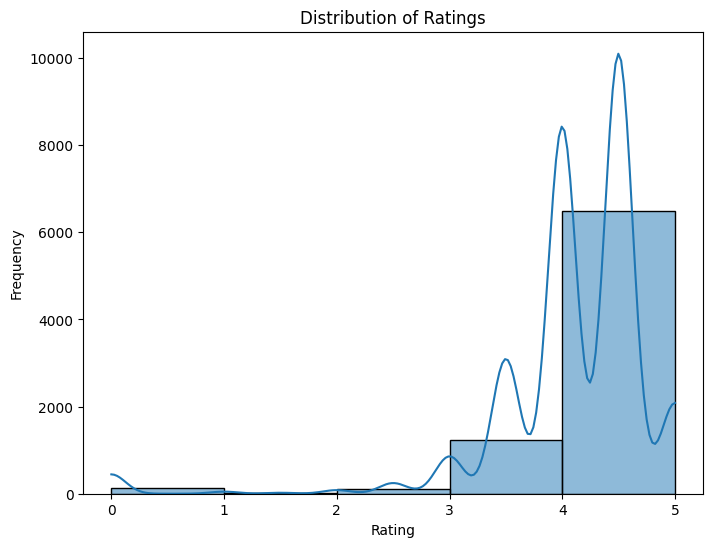

In [6]:
# Visualize the distribution of ratings (histogram)
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x=train_df.columns[5], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

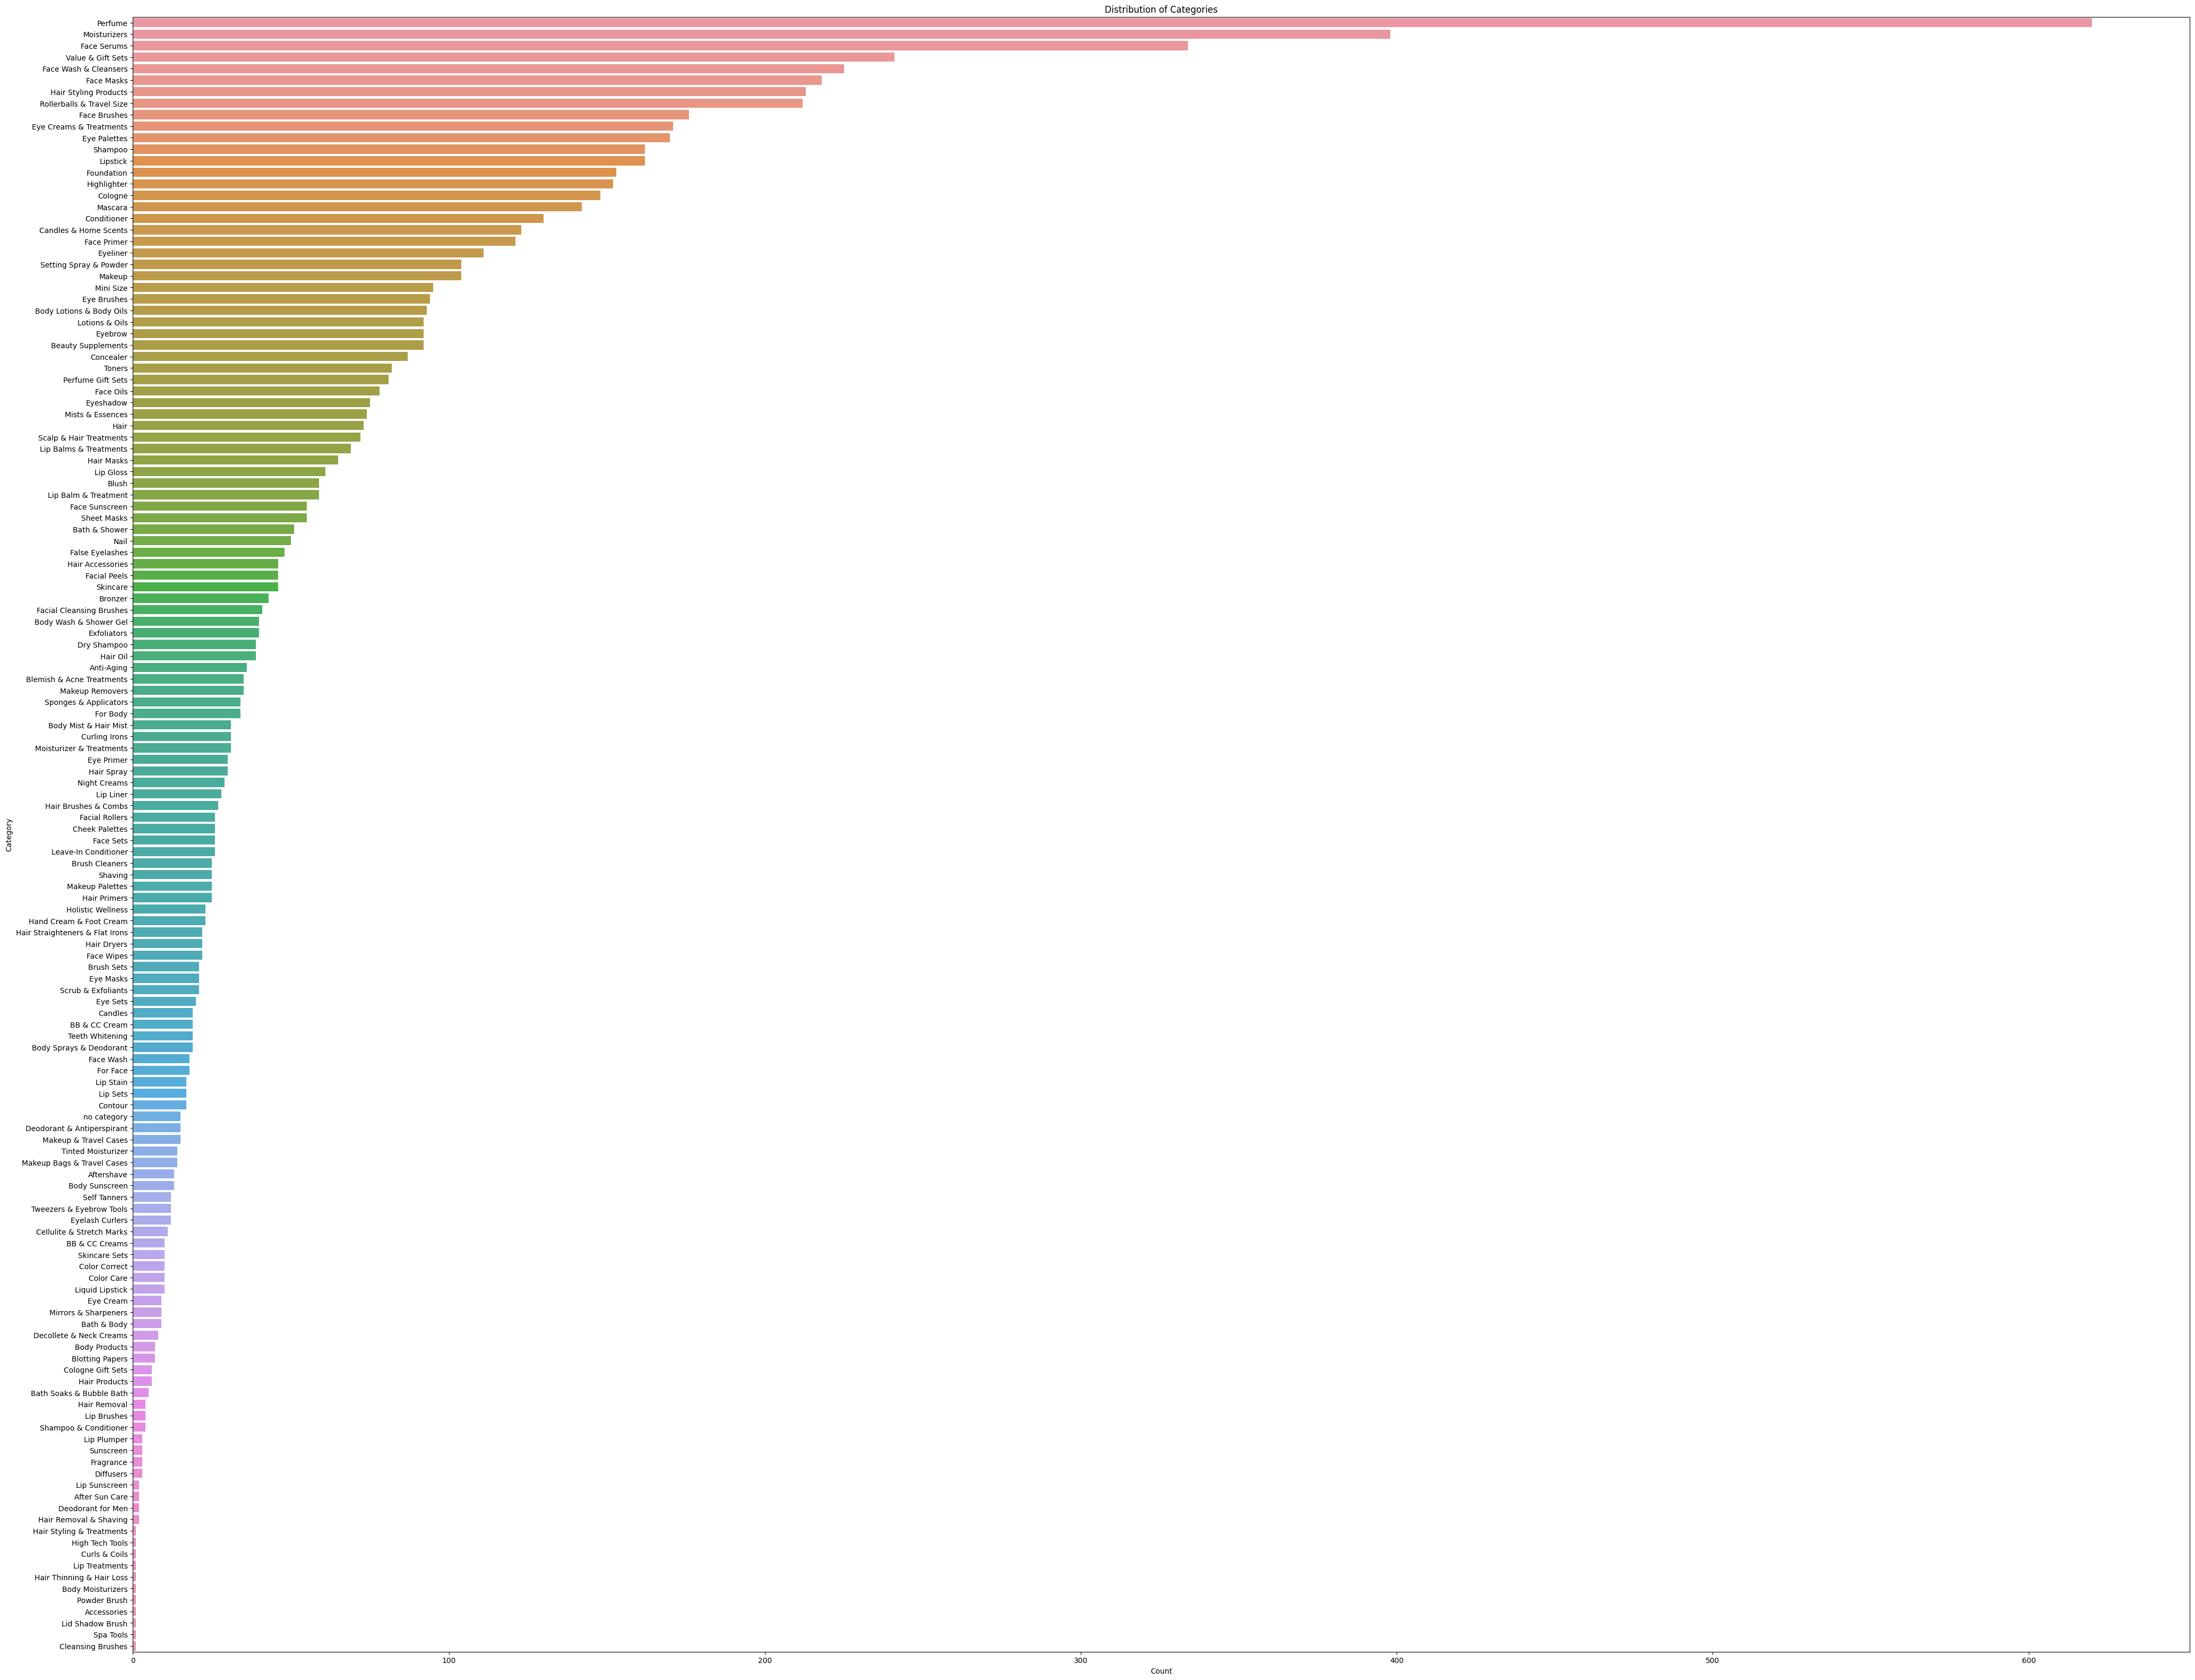

In [7]:
# Visualize the distribution of categories
plt.figure(figsize=(50,40))
sns.countplot(data=train_df, y=train_df.columns[2], order=train_df[train_df.columns[2]].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

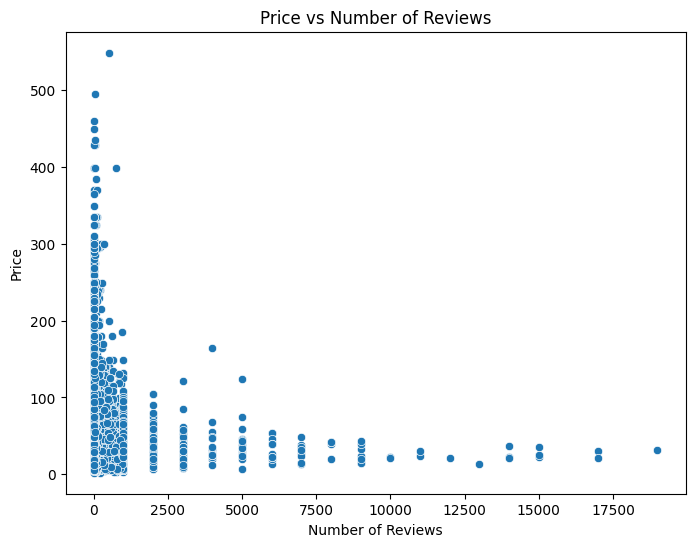

In [8]:
# Visualize the relationship between price and number of reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x=train_df.columns[6], y=train_df.columns[8])
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = ['price', 'love', 'value_price']
target = 'rating'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict ratings on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Display the mean squared error
print("Mean Squared Error:", mse)

# Optionally, you can also print the coefficients of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.6895877280291807
Coefficients: [ 1.32601321e-03  1.39902878e-06 -5.10504737e-04]
Intercept: 4.031587299564234
